In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
os.getcwd()

'/home/vizziwo/capcookie/models'

In [2]:
X_train = pd.read_csv('../data/processed/X2_train.csv', index_col=0)
X_test = pd.read_csv('../data/processed/X2_test.csv', index_col=0)
y_train = pd.read_csv('../data/processed/y2_train.csv', index_col=0)
y_test = pd.read_csv('../data/processed/y2_test.csv', index_col=0)

In [3]:
X_train.head()

,signs_of_mental_illness,body_camera,gender_F,gender_M,threat_level_attack,threat_level_not_attack,threat_level_unspecified,flee_Car,flee_Foot,flee_Not fleeing,...,armed_knife,armed_machete,armed_other,armed_sword,armed_toy weapon,armed_unarmed,armed_undetermined,armed_unknown weapon,armed_vehicle,standardized_age
2836,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.740107
1157,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.504791
744,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.269475
1448,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0.583230
3339,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-0.907106


TRYING DUMMY CLASSIFIER

Because my data is imbalanced

In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_confusion_matrix, f1_score, recall_score
from sklearn.model_selection import cross_val_score


dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)


DummyClassifier(random_state=42, strategy='most_frequent')

Accuracy: 0.5559183673469388
[[681   0]
 [544   0]]
ROC_AUC: 0.5


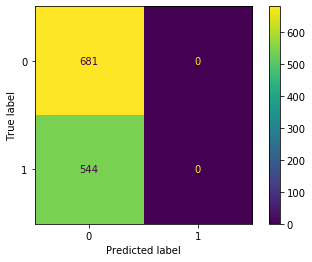

In [5]:
y_predict_dummy = dummy.predict(X_test)
print('Accuracy:', dummy.score(X_test, y_test))
print(confusion_matrix(y_test, y_predict_dummy))
plot_confusion_matrix(dummy, X_test, y_test)
predprob = dummy.predict_proba(X_test)[:,1]
print('ROC_AUC:', roc_auc_score(y_test, predprob))
f1_dum = f1_score(y_test, y_predict_dummy)
recall_dum = recall_score(y_test, y_predict_dummy)
auc_dum = roc_auc_score(y_test, dummy.predict_proba(X_test)[:,1])

In [6]:
cv_scores_test= cross_val_score(dummy,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(dummy,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_dum_test= cv_scores_test.mean()
cv_scores_dum_train= cv_scores_train.mean()
cv_scores_std_dum= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_dum_test))
print ('Mean cross validation train score: ' +str(cv_scores_dum_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_dum))

[0. 0. 0. 0. 0.]
Mean cross validation test score: 0.0
Mean cross validation train score: 0.0
Standard deviation in cv scores: 0.0


Since I'm interested mostly in how many 'True' were predicted 'True,' the F1 Score seems especially useful for me. I may also want to look at 'Recall' to judge a model by its false negatives.

SUPERVISED LEARNING

SVM 

[[466 215]
 [189 355]]
0.6702040816326531
0.637342908438061


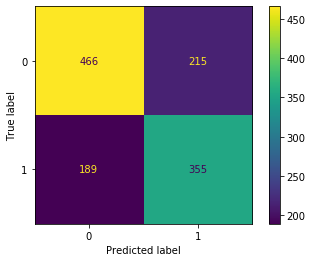

In [7]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
Accuracy_svm=svm.score(X_test,y_test)
f1_svm = f1_score(y_test, y_predict_svm)
recall_svm = recall_score(y_test, y_predict_svm)
auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test)[:,1])

print(cnf_matrix)
print(Accuracy_svm)
print(f1_score(y_test, y_predict_svm))
plot_confusion_matrix(svm, X_test, y_test)

In [8]:
cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

[0.56744186 0.58604651 0.60089686 0.56363636 0.54460094]
Mean cross validation test score: 0.572524507136614
Mean cross validation train score: 0.6382781211018702
Standard deviation in cv scores: 0.01935145017734934


The SVM does ok compared to this, given ROC_AUC. 0.5 compared to 0.67.

RANDOM FOREST

Accuracy: 0.6261224489795918
ROC_AUC: 0.6785207199619936
F1 Score: 0.5621414913957935
Recall Score: 0.5404411764705882


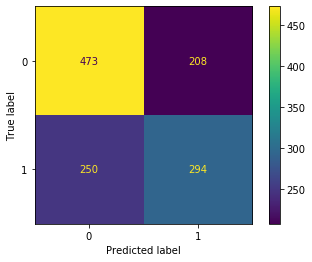

In [9]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='gini')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
plot_confusion_matrix(rf, X_test, y_test)
predprob = rf.predict_proba(X_test)[:,1]
Accuracy_rf=rf.score(X_test,y_test)
f1_rf = f1_score(y_test, y_predict_rf)
recall_rf = recall_score(y_test, y_predict_rf)
auc_rf = roc_auc_score(y_test, predprob)

print('Accuracy:', Accuracy_rf)
print('ROC_AUC:', roc_auc_score(y_test, predprob))
print('F1 Score:', f1_score(y_test, y_predict_rf))
print('Recall Score:', recall_score(y_test, y_predict_rf))


In [10]:
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.55172414 0.51886792 0.50731707 0.4729064  0.46153846]
Mean cross validation test score: 0.5024708002218833
Mean cross validation train score: 0.5972601433628137
Standard deviation in cv scores: 0.0324584448181385


GRADIENT BOOST

Accuracy: 0.6424489795918368
F1 Score: 0.5989010989010989
ROC-AUC: 0.6912655480694481
Recall Score: 0.6011029411764706


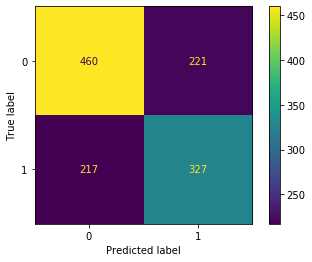

In [11]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
plot_confusion_matrix(gbc, X_test, y_test)
predprob = gbc.predict_proba(X_test)[:,1]
Accuracy_gbc=gbc.score(X_test,y_test)
f1_gbc = f1_score(y_test, y_predict_gbc)
recall_gbc = recall_score(y_test, y_predict_gbc)
auc_gbc = roc_auc_score(y_test, predprob)

print('Accuracy:', Accuracy_gbc)
print('F1 Score:', f1_score(y_test, y_predict_gbc))
print('ROC-AUC:', roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1]))
print('Recall Score:', recall_score(y_test, y_predict_gbc))


In [12]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.56730769 0.56338028 0.54901961 0.52427184 0.5       ]
Mean cross validation test score: 0.5407958853002329
Mean cross validation train score: 0.6142686605261505
Standard deviation in cv scores: 0.025368912708523143


LOGISTIC REGRESSION

Accuracy: 0.6751020408163265
F1 Score: 0.6375227686703097
ROC-AUC: 0.7122230500129567
Recall Score: 0.6433823529411765


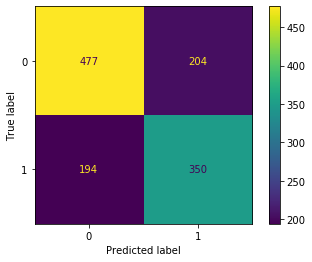

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_predict_lr)
plot_confusion_matrix(lr, X_test, y_test)

predprob = lr.predict_proba(X_test)[:,1]
Accuracy_lr=lr.score(X_test,y_test)
f1_lr = f1_score(y_test, y_predict_lr)
recall_lr = recall_score(y_test, y_predict_lr)
auc_lr = roc_auc_score(y_test, predprob)

print('Accuracy:', Accuracy_lr)
print('F1 Score:', f1_score(y_test, y_predict_lr))
print('ROC-AUC:', roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print('Recall Score:', recall_score(y_test, y_predict_lr))


In [14]:
cv_scores_test= cross_val_score(lr,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(lr,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

[0.54271357 0.57674419 0.59813084 0.58653846 0.51886792]
Mean cross validation test score: 0.5645989962147933
Mean cross validation train score: 0.6333470101378179
Standard deviation in cv scores: 0.02940589495445585


In [15]:
models = ['dummy', 'svm', 'rf', 'gbc', 'lr']
auc = [auc_dum, auc_svm, auc_rf, auc_gbc, auc_lr]
recall = [recall_dum, recall_svm, recall_rf, recall_gbc, recall_lr]
cv_f1_train = [cv_scores_dum_train, cv_scores_svm_train, cv_scores_rf_train, cv_scores_gbc_train, cv_scores_lr_train]
cv_f1_test = [cv_scores_dum_test, cv_scores_svm_test, cv_scores_rf_test, cv_scores_gbc_test, cv_scores_lr_test]

df = pd.DataFrame(list(zip(models, auc, recall, cv_f1_train, cv_f1_test)),
                 columns = ['Model', 'AUC Score', 'Recall Score', 'CV F1 Scores: Train', 'CV F1 Scores: Test'])
df

,Model,AUC Score,Recall Score,CV F1 Scores: Train,CV F1 Scores: Test
0,dummy,0.500000,0.000000,0.000000,0.000000
1,svm,0.712790,0.652574,0.638278,0.572525
2,rf,0.678521,0.540441,0.597260,0.502471
3,gbc,0.691266,0.601103,0.614269,0.540796
4,lr,0.712223,0.643382,0.633347,0.564599


The highest performing models were SVM and Logistic Regression.

HYPERPARAMETER TUNING

Logistic Regression

In [16]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='f1')
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.639970 using {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.639970 (0.016183) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.639724 (0.016226) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.639970 (0.016183) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.639936 (0.016691) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.639970 (0.016183) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.639970 (0.016183) with: {'C': 10, 'penalty': 'none', 'solver': 'newton-cg'}
0.639724 (0.016226) with: {'C': 10, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 10, 'penalty': 'none', 'solver': 'liblinear'}
0.639525 (0.014988) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.638055 (0.016278) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.639525 (0.014988) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.639970 (0.016183) with: {'C': 

0.6342342342342343


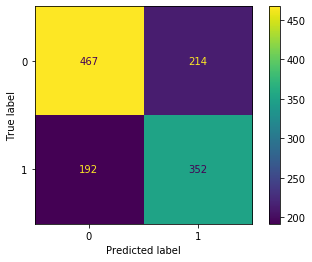

In [17]:
lr = LogisticRegression(C=100, penalty='none', solver='newton-cg')
lr.fit(X_train, y_train)
y_predict_lr_tune = lr.predict(X_test)
print(f1_score(y_test, y_predict_lr_tune))
plot_confusion_matrix(lr, X_test, y_test)


Out of curiousity, I'm trying the second best model, too.

0.6342342342342343


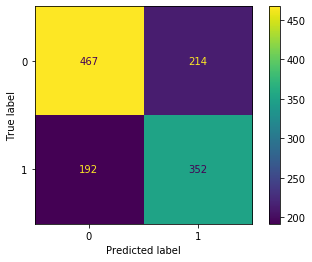

In [18]:
lr2 = LogisticRegression(C=100, penalty='none', solver='lbfgs')
lr2.fit(X_train, y_train)
y_predict_lr_tune = lr.predict(X_test)
print(f1_score(y_test, y_predict_lr_tune))
plot_confusion_matrix(lr, X_test, y_test)


This is better.

# help: CV on test scores or simple fit_predict?

# I forgot the point of Cross_val_score() 

# Why is the above code consistently giving me 0.64 test score, but the below Cross_val is 0.58. 
# Why do cross_val again?

In [19]:
cv_scores_train= cross_val_score(lr2,X_train,y_train,cv=5,scoring='f1')
cv_scores_test= cross_val_score(lr2,X_test,y_test,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

[0.53398058 0.58373206 0.63348416 0.59813084 0.53636364]
Mean cross validation train score: 0.6397241475765615
Mean cross validation test score: 0.5771382560643199
Standard deviation in cv scores: 0.03790562611922576


TANGENT:

OF THE PEOPLE WHO THE MODEL PREDICTED TO BE BLACK, WHAT RACIAL IDENTITY DID THEY ACTUALLY BELONG TO?

In [20]:
idx = X_test[y_predict_lr_tune == 1].index
df = pd.read_csv('../data/processed/fatalwrangling.csv', index_col=0)
df.loc[idx].race.value_counts()

B    201
W    196
H    151
A     13
N      3
O      2
Name: race, dtype: int64

USING SMOTE TO CREATE MORE SAMPLES OF MY LESS REPRESENTED CLASS

In [21]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.values)

FITTING MY TUNED MODEL (using the original training data) ON THE RESAMPLED TRAINING DATA

0.6360360360360361


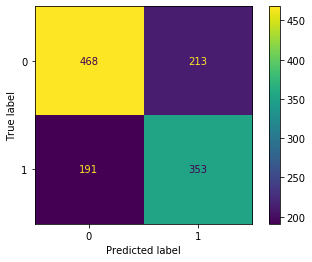

In [22]:
# Best: 0.639970 using {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}

clf = LogisticRegression(C=100, penalty='none', solver='newton-cg')
model_res = clf.fit(X_train_res, y_train_res)
y_predict_lr_res =  model_res.predict(X_test)
print(f1_score(y_test, y_predict_lr_res))
plot_confusion_matrix(model_res, X_test, y_test)

# Would I do the GridSearch / Hyperparameter tuning on the resampled data? Or use the tuned model from the non-resampled data? Anyway I tried both. 

Grid Search with Resampled Data

In [23]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='f1')
grid_result = grid_search.fit(X_train_res, y_train_res)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.671115 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.604269 (0.091610) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.629436 (0.042269) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.622057 (0.059589) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.631431 (0.041398) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.628928 (0.046170) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.604269 (0.091610) with: {'C': 10, 'penalty': 'none', 'solver': 'newton-cg'}
0.629436 (0.042269) with: {'C': 10, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 10, 'penalty': 'none', 'solver': 'liblinear'}
0.638377 (0.036640) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.639458 (0.030042) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.643156 (0.030924) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.604269 (0.091610) with: {'C': 1.

0.6451612903225806


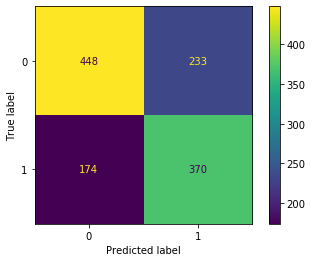

In [24]:
lr = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
lr.fit(X_train_res, y_train_res)
y_predict_lr_resampled = lr.predict(X_test)
print(f1_score(y_test, y_predict_lr_resampled))
plot_confusion_matrix(lr, X_test, y_test)

# AGAIN, I DON'T THINK I SHOULD BE DOING CV HERE, NEED SOME GUIDANCE 

In [25]:
#Trying CV again on the Test Data, using the BEST model above trained on resampled data.
# Best: 0.667437 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
lr = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
cv_scores_test= cross_val_score(lr,X_test,y_test,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

[0.49473684 0.55660377 0.59047619 0.56122449 0.52736318]
Mean cross validation test score: 0.546080896008376
Standard deviation in cv scores: 0.032550164875868204


THE CV TEST SCORE DECREASED BUT THE FIT_PREDICT SCORE INCREASED.

Plotting Feature Importance - Logistic Regression

In [26]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(20,20))
    plt.rc('ytick', labelsize=20) 
    plt.rc('xtick', labelsize=20)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)   # fontsize of the x and y labels
    plt.title('Feature Importances for Tuned Logistic Regression Model')
    plt.xlabel('Size of Coefficient')
    plt.ylabel('Name of Feature')
    plt.show()

In [27]:
#BEST PERFORMING MODEL: TUNED on ORIGINAL DATA, FIT on RESAMPLED DATA

lr = LogisticRegression(C=100, penalty='none', solver='newton-cg')
model_res = lr.fit(X_train_res, y_train_res)
y_predict_lr_res =  model_res.predict(X_test)

#index of top features
print(lr.coef_.argsort()[:, -30:])
#names of top features, ascending
print(X_test.columns[lr.coef_.argsort()[:, -30:]])
#coefficients of top festures, ascending
print(np.sort(lr.coef_)[:, -30:])

[[44 47  8 94 45 96 52 90 97 89 95 98 92  2 20 87  4  5  3  6 91  0 99 11
  12  1 64 65 66 67]]
[['state_NJ' 'state_NY' 'flee_Foot' 'armed_toy weapon' 'state_NM'
  'armed_undetermined' 'state_RI' 'armed_knife' 'armed_unknown weapon'
  'armed_gun' 'armed_unarmed' 'armed_vehicle' 'armed_other' 'gender_F'
  'state_DC' 'armed_Taser' 'threat_level_attack'
  'threat_level_not_attack' 'gender_M' 'threat_level_unspecified'
  'armed_machete' 'signs_of_mental_illness' 'standardized_age'
  'manner_of_death_shot' 'manner_of_death_shot_and_tasered' 'body_camera'
  'season_fall' 'season_spring' 'season_summer' 'season_winter']]
[[-13.98443664 -13.96973354 -13.79053507 -13.65667758 -13.58605605
  -13.52259902 -13.51449169 -13.50146022 -13.49490166 -13.37315886
  -13.35284845 -13.28849111 -13.2032675  -13.09574723 -13.04869884
  -12.84770121 -12.51693383 -12.43662124 -12.40599369 -12.29094744
  -12.26749102  -0.85358726  -0.55889542  -0.15260918  -0.07143811
    0.35780872   1.57151149   1.86260927   

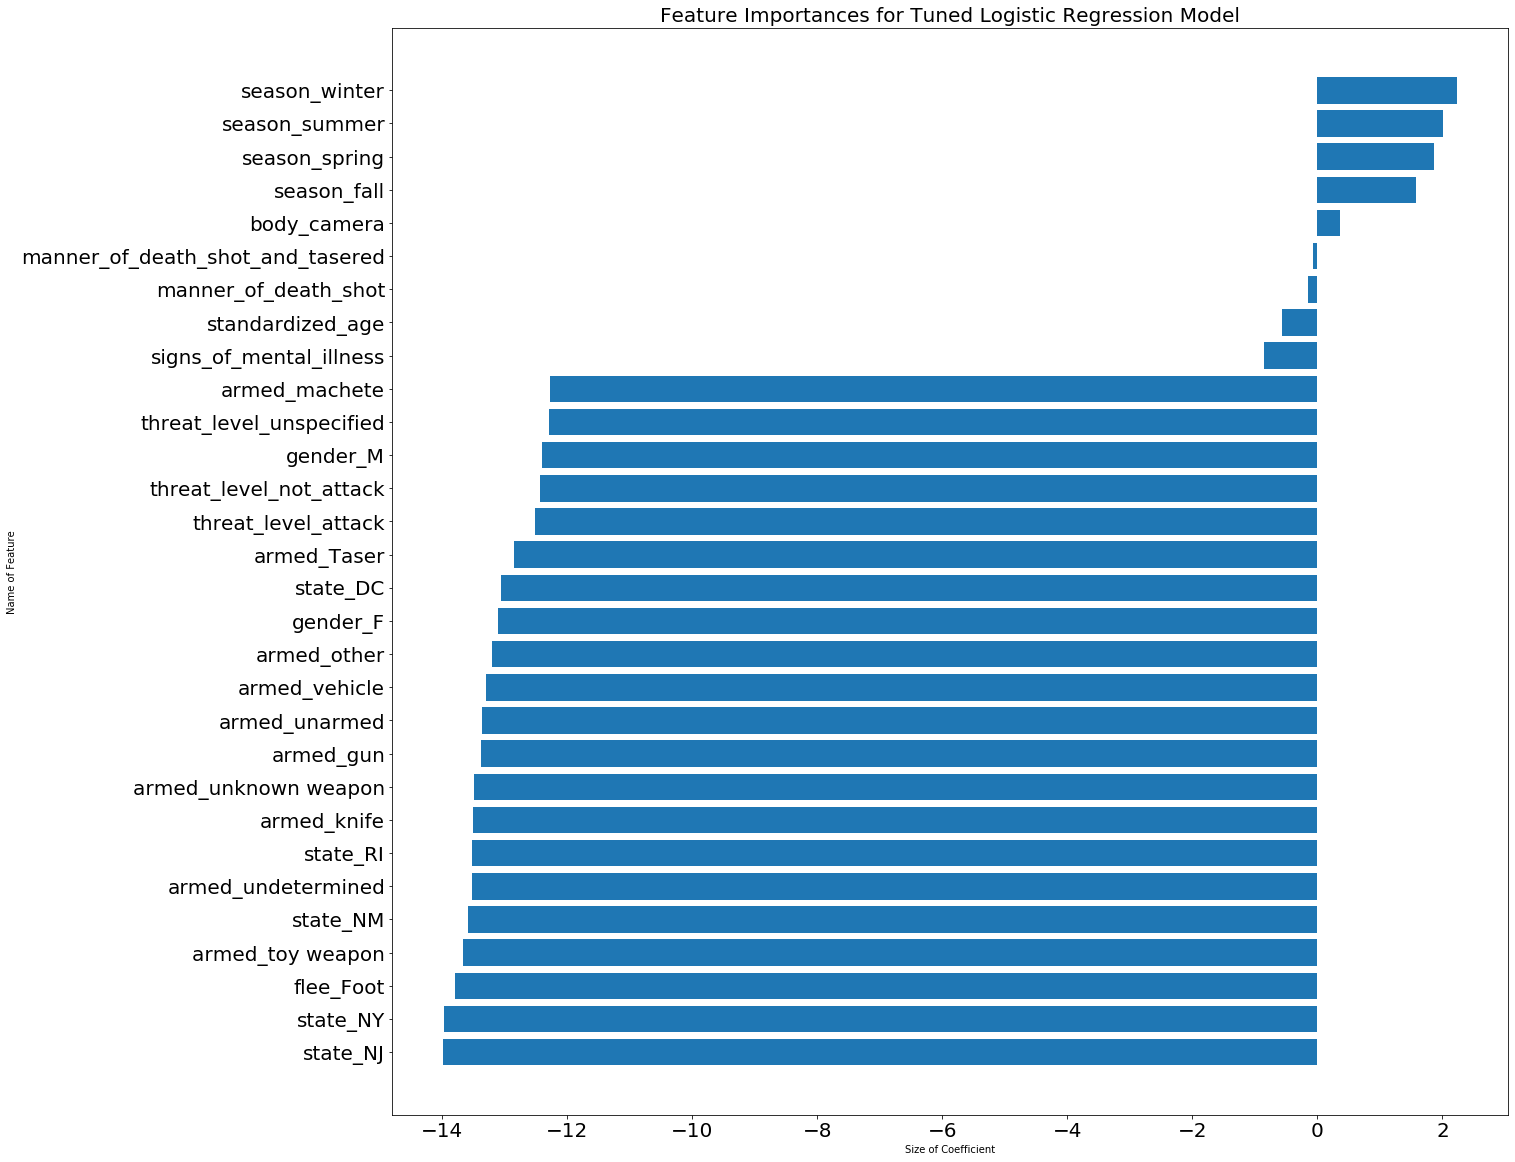

In [28]:
feature_names = X_test.columns[lr.coef_.argsort()[0, -30:]]
importances = np.sort(lr.coef_)[0, -30:]
f_importances(importances, feature_names)

#### When I hadn't include day-of-week, month, and season, the feature importances were more readable-. Here they are unreadable. Perhaps I need to do L1 regularization first. 

SVM, Hyperparameter Tuning

In [30]:
#took 35 min
cw = ['balanced', None]

# svm.coef_ attribute is only availabel on linear kernels, so...
kernel = ['linear']

C = [0.01, .1, 1, 10, 100, 1000]
gamma = ['scale','auto']
grid = dict(class_weight=cw, kernel=kernel, C=C, gamma=gamma)

model = SVC()

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           cv=5, scoring='f1', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# Why does my source that I'm following use cv = RepeatedStratifiedKFold(....) instead of cv=5? Is this an outdated thing, I think it automatically used Kfold or RepeatedStratifiedKFold with the cv arg.
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [31]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.661085 using {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.637506 (0.016670) with: {'C': 0.01, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.637506 (0.016670) with: {'C': 0.01, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear'}
0.600966 (0.018962) with: {'C': 0.01, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
0.600966 (0.018962) with: {'C': 0.01, 'class_weight': None, 'gamma': 'auto', 'kernel': 'linear'}
0.655485 (0.009073) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.655485 (0.009073) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear'}
0.628748 (0.020738) with: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
0.628748 (0.020738) with: {'C': 0.1, 'class_weight': None, 'gamma': 'auto', 'kernel': 'linear'}
0.660895 (0.009666) with: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.

In [32]:
#Took 5min
#Best: 0.657177 using {'C': 100, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
svc= SVC(C=100, class_weight='balanced', gamma='scale', kernel='linear')

cv_scores_train= cross_val_score(svc,X_train,y_train,cv=5,scoring='f1')
cv_scores_test= cross_val_score(svc,X_test,y_test,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

[0.59030837 0.60759494 0.66122449 0.61087866 0.55932203]
Mean cross validation train score: 0.6608941645800457
Mean cross validation test score: 0.6058656983070007
Standard deviation in cv scores: 0.033169440802270606


In [33]:
#took 3min
#same but with X_train_res, y_train_res

svc= SVC(C=100, class_weight='balanced', gamma='scale', kernel='linear')

cv_scores_train= cross_val_score(svc,X_train_res,y_train_res,cv=5,scoring='f1')
cv_scores_test= cross_val_score(svc,X_test,y_test,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

[0.59030837 0.60759494 0.66122449 0.61087866 0.55932203]
Mean cross validation train score: 0.6457444314430717
Mean cross validation test score: 0.6058656983070007
Standard deviation in cv scores: 0.033169440802270606


In [ ]:
#took 3 min
svc= SVC(C=100, class_weight='balanced', gamma='scale', kernel='linear', probability=True)
#fit training set
svc.fit(X_train, y_train)
y_predict_svc = svc.predict(X_test)
#scores svc
predprob = svc.predict_proba(X_test)[:,1]
Accuracy_svc=svc.score(X_test,y_test)
f1_svc = f1_score(y_test, y_predict_svc)
recall_svc = recall_score(y_test, y_predict_svc)
auc_svc = roc_auc_score(y_test, predprob)

#fit resampled data
svc.fit(X_train_res, y_train_res)
y_predict_svc_res = svc.predict(X_test)

#scores svc_resampled
predprob = svc.predict_proba(X_test)[:,1]
Accuracy_svc_res=svc.score(X_test,y_test)
f1_svc_res = f1_score(y_test, y_predict_svc_res)
recall_svc_res = recall_score(y_test, y_predict_svc_res)
auc_svc_res = roc_auc_score(y_test, predprob)



models = ['fit_on_training_data', 'fit_on_resampled_training_data']
auc = [auc_svc, auc_svc_res]
recall = [recall_svc, recall_svc_res]
f1s = [f1_svc, f1_svc_res]

df = pd.DataFrame(list(zip(models, auc, recall, f1s)),
                 columns = ['Model', 'AUC Score', 'Recall Score', 'F1 Score'])
df

In [ ]:
#took 
#Cross Validated F1 Score on Test Data
svc.fit(X_train, y_train)
cv = cross_val_score(svc, X_test, y_test,scoring='f1').mean()
print('Cross Validated F1 Score on Test Data:', cv)

# I didn't try GridSearchCV for SVM fitting on the resampled training data. It took me a long time to do the GridSearch in the first place, so I'll wait til I hear from DJ before I do this.

In [ ]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(20,20))
    plt.rc('ytick', labelsize=20) 
    plt.rc('xtick', labelsize=20)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)   # fontsize of the x and y labels
    plt.title('Feature Importances for Tuned SVC Model')
    plt.xlabel('Size of Coefficient')
    plt.ylabel('Name of Feature')
    plt.show()

In [ ]:
#index of top features
print(svc.coef_.argsort()[:, -30:])
#names of top features, ascending
print(X_test.columns[svc.coef_.argsort()[:, -30:]])
#coefficients of top festures, ascending
print(np.sort(svc.coef_)[:, -30:])

In [ ]:
feature_names = X_test.columns[svc.coef_.argsort()[0, -30:]]
importances = np.sort(svc.coef_)[0, -30:]
f_importances(importances, feature_names)

# What do you think? Do I need to do L1 Regularization? 

# I'm confused about CV.
# The code I copied from the example, does GridSear